<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch7_1~5_pg_409~451_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch7. 1 ~ 5 pg. 409 ~ 451 필사


# CHO7. 군집화

## CH07.01. K-평균 알고리즘 이해

K-평균 : 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법
- 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- 단계 : 특정한 임의의 지점, 군집 중심점 선택 > 해당 중심에 가장 가까운 포인트 선택 > 선택된 포인트의 평균 지점으로 군집 중심점 이동 > 이동된 중심점에서 다시 가까운 포인트 선택(반복) > ... > 더이상 중심점의 이동이 없을 경우, 반복 종료 + 해당 중심점에 속하는 데이터 포인트들을 군집화


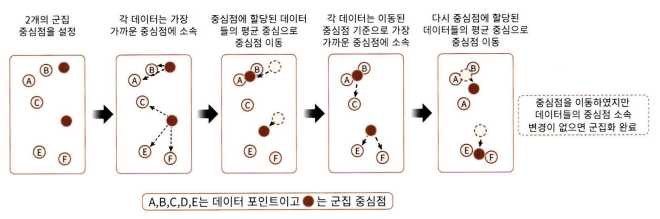
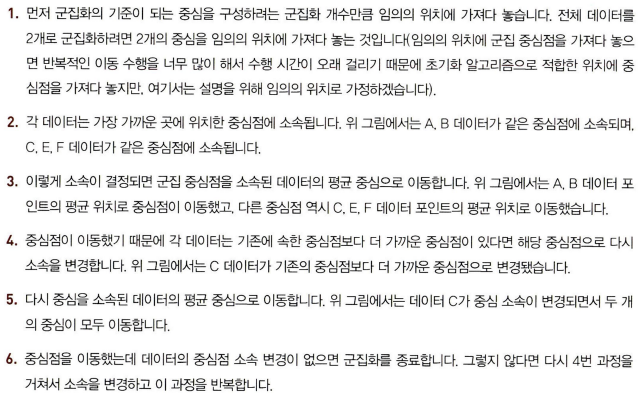


K-평균 알고리즘의 장점과 단점

- K-평균의 장점
 - 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
 - 알고리즘이 쉽고 간결하다.

- K-평균의 단점
 - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다.(>PCA로 차원 감소 적용해야 할 수도 있음)
 - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
 - 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어렵다.



### 사이킷런 KMeans 클래스 소개
- 사이킷런 패키지 : K-평균을 구현하기 위해 KMeans 클래스를 제공함
- fit(데이터 세트), fit_transform(데이터 세트) 메서드를 이용해 수행

```python
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
```

**중요 파라미터**
- n_clusters : 군집화할 개수 = 군집 중심점의 개수 지정, KMeans 초기화 파라미터 중 가장 중요한 파라미터
- init : 초기에 군집 중심점의 좌표를 설정할 방식, 보통 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정함
- max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함.

**수행되어 군집화 수행이 완료된 KMeans 객체의 주요 속성 정보**
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표(Shape: [군집 개수, 피처 개수]), 이를 이용 시 군집 중심점 좌표가 어디인지 알 수 있음

### K-평균을 이용한 붓꽃 데이터 세트 군집화
: 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인하고, 이를 분류값과 비교하기

1. 필요한 모듈과 데이터 세트 로드, 데이터셋 DataFrame으로 변경하기

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


2. 붓꽃 데이터 세트를 3개 그룹으로 군집화하기
 - n_cluster = 3, 초기 중심 설정 방식 : k-means++(디폴트 값), 최대 반복 횟수 : max_iter=300(디폴트 값) 설정한 KMeans 객체 만들고 fit() 수행하기

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

3. fit()을 수행해 irisDF 데이터에 대한 군집화 수행 결과의 반환값인 kmeans 객체 변수의 label_ 속성값 출력하기
 - kmeans의 label_ 속성값 > 각 데이터가 어떤 중심에 속하는지를 알 수 있음

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


> 결과 : labels_ 값 0(첫 번째 군집),1(두 번째 군집),2(세 번째 군집)

4. 실제 붓꽃 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보기

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


> 결과
- 분류 타깃 0값 데이터 : 1번 군집으로 모두 잘 그루핑됨
- 분류 타깃 1값 데이터 : 2개만 2번 군집으로 그루핑됨 / 나머지 48개 : 모두 0번 군집으로 그루핑됨
- 분류 타깃 2값 데이터 : 0번 군집에 14개 / 2번 군집에 36개로 분산돼 그루핑됨


5. 붓꽃 데이터 세트의 군집화를 시각화해보기

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


- pca_x : X 좌표 값
- pca_y : Y 좌표 값
- 군집별 마커 : cluster 0 = 마커 'o' / cluster 1 = 마커 's' / cluster 2 = 마커 '^'


6. 맷플롯립의 산점도는 서로 다른 마커를 한 번에 표현할 수 X > 마커별로 별도의 산점도 수행하기

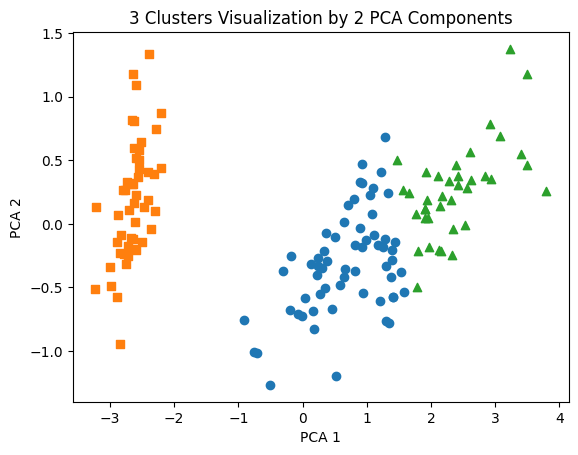

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

>
- Cluster 1 = 네모('s') : 명확히 다른 군집과 잘 분리되어 있음
- Cluster 0(동그라미), Cluster 2(세모) : 상당 수준 분리, but 네모만큼 명확하게 분리는 X

### 군집화 알고리즘 테스트를 위한 데이터 생성
- 사이킷런 : 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 데이터 생성기를 제공함
- 둘 모두 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능
 - make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능이 추가됨
 - make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용 가능
 - 둘 모두, 분류 용도로도 테스트 데이터 생성이 가능함
 - make_circle(), make_moon() API : 중심 기반의 군집화로 해결하기 여러운 데이터 세트를 만드는 데 사용됨


**make_blobs()의 간략한 사용법 알아보면서 군집화를 위한 테스트 데이터 세트를 만드는 방법 살펴보기**

- make_blobs() 호출 시, 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환됨
- make_blobs()의 호출 파라미터
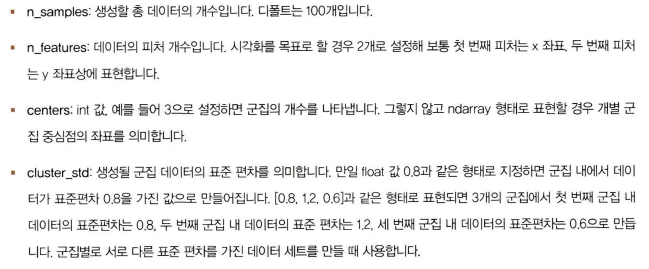

- make_blobs()의 cluster_std 파라미터 : 데이터 분포도 조절
 - cluster_std가 작을수록 군집 중심에 데이터가 모여 있음 / 클수록 데이터가 퍼져있음

1. X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 호출 시: 총 200개 레코드, 2개 피처가 4개의 군집화 기반 분포도를 가진 피처 데이터 세트 X & 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됨
- shape : (200,2) / (200,)
- 3개의 cluster 값 : [0,1,2] / 67,67,66개로 균일하게 구성됨

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


2. 위 데이터 세트를 DataFrame으로 변환하기
- 피처의 이름 : 'ftr1', 'ftr2'

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


3. make_blobs()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인하기
- 타깃 0,1,2에 따라 마커를 다르게 해 산점도 그려보기 > 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트 만들어졌음을 확인 가능

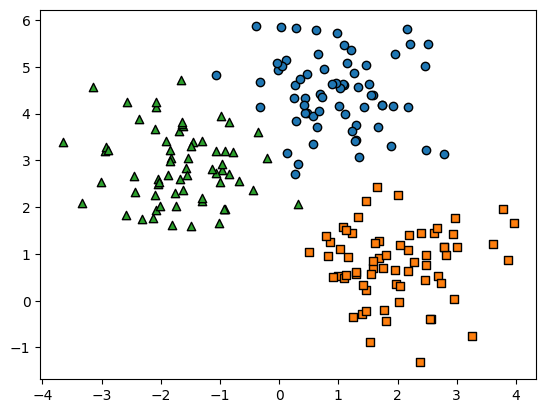

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역을 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster  = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

4. 위의 만들어진 데이터 세트에 KMeans 군집화 수행 후 군집별로 시각화하기

4-1. KMeans 객체에 fit_predict 수행해 make_blobs()의 피처 데이터 세트인  X 데이터를 군집화하기

4-2. 4-1의 결과를 앞에서의 clusterDF DataFrame의 'kmeans_label' 칼럼으로 저장하기

- KMeans 객체의 cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표를 나타내기 위해 사용

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


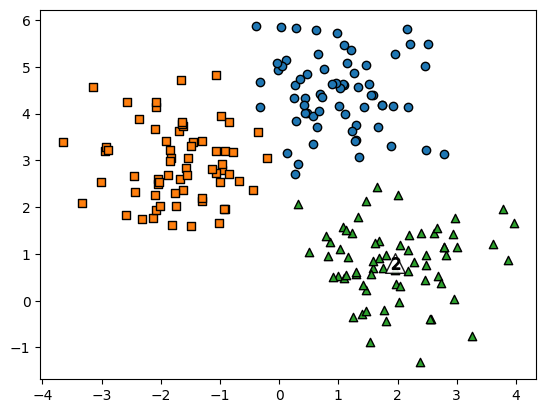

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

# 군집별 중심 위치 좌표 시각화
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
            alpha=0.9, edgecolor='k', marker=markers[label])
plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',
            marker='$%d$' % label)

- make_blobs()의 타깃과 kmeans_label : 군집 번호 의미 > 서로 다른 값으로 매핑될 수 있음 > 산점도의 마커가 서로 다를 수 있음

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


> 결과
Target 0 > label 0 / Target 1 > label 2 / Target 2 > label 1 로 거의 대부분 잘 매핑됨

## CH07.02. 군집 평가(Cluster Evaluation)

- 대부분의 군집화 데이터 세트 : 비교할 만한 타깃 레이블 가지고 있지 X
- 또한, 군집화 : 분류와 유사해 보일 수 있으나, 성격이 많이 다름 > 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미 부여 or 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구 or 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역 가지고 있음

> 군집화의 성능 평가 방법 ? **실루엣 분석**

### 실루엣 분석(silhouette analysis)의 개요
실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지(=다른 군집과의 거리는 떨어져 있고 돌일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있는지)를 나타냄
- 군집화가 잘될수록 개별 군집 : 비슷한 정도의 여유 공간 가지고 떨어져 있을 것

- 실루엣 계수(silhouette coefficient, 개별 데이터가 가지는 군집화 지표) 기반의 실루엣 분석 : 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표 기반
- 개념
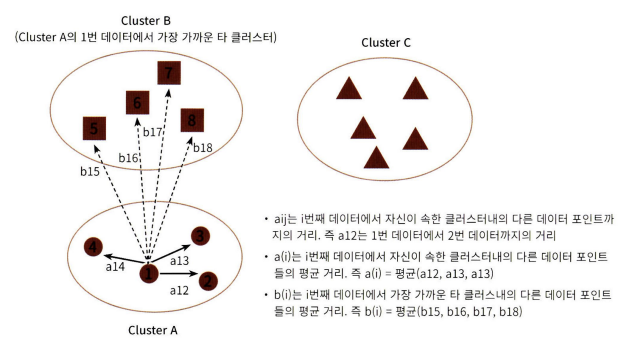

- 실루엣 계수 s(i)의 정의

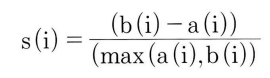

- 실루엑 계수의 의미 : -1 ~ 1 사이의 값을 가짐, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 뜻, 0에 가까울수록 근처의 군집과 가까워진다는 뜻 / - 값 : 다른 군집에 데이터 포인트가 할당됨

- 사이킷런의 실루엣 분석을 위한 메서드

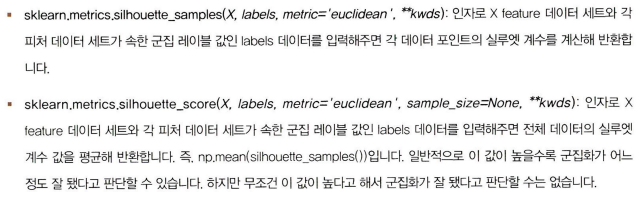
- 좋은 군집화가 되기 위한 조건

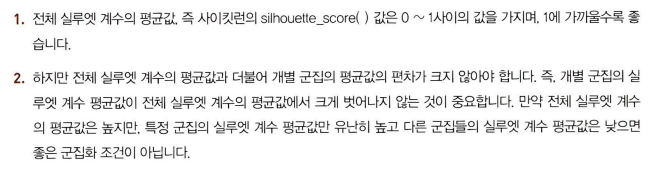

### 붓꽃 데이터 세트를 이용한 군집 평가
: 앞의 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해보기
- sklearn.metrics 모듈의 silhouette_samples()와 silhouette_score() 이용

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


> 결과 : 1번 군집 : 실루엣 계수 평균 높음 / 0,2번 군집 : 상대적으로 평균값 1번에 비해 낮음

- 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값 구하기

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
특정 군집 내의 실루엣 계수남 너무 높고, 다른 군집은 내부 데이터끼리의 거리나 너무 떨어져 있더라도 평균적으로 높은 실루엣 계수 값 가질 수 있음

- K-평균의 적절한 군집개수가 설정되었다 = 개별 군집별로 적당히 분리된 거리 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우

- 평균 실루엑 계수 값이 작더라도, 개별 군집의 평균 실루엣 계수 값이 균일하게 위치하고 있어야 이상적인 군집화 개수!

```
visualize_silhouette([2, 3, 4, 5], X_features)
```
: 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수 값을 시각화해서 군집의 개수를 정하는 데 도움을 주는 함수

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

- make_blobs() 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트를 만들고 이를 K-평균으로 군집화할 때, 2개, 3개, 4개, 5개 중 최적의 군집 개수를 시각화로 알아보기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


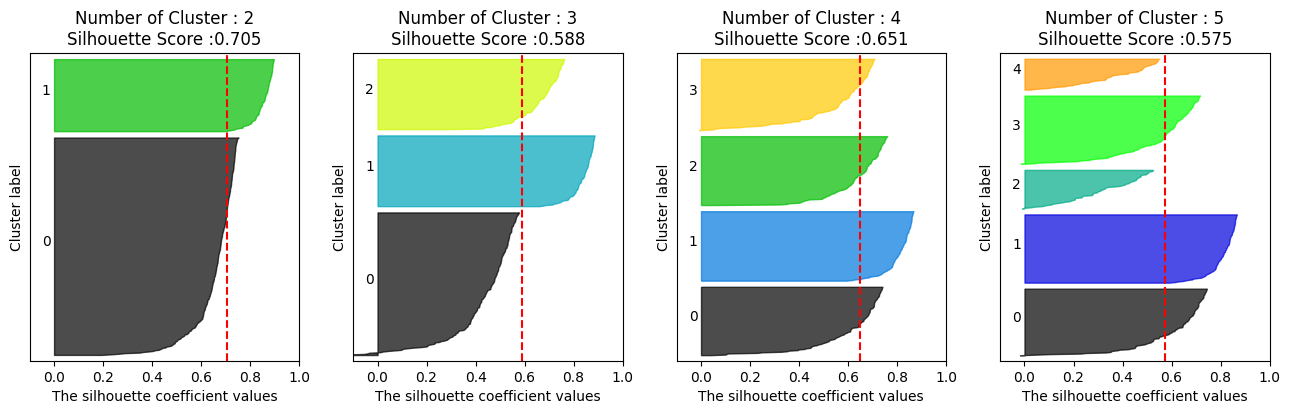

In [ ]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

> 결과 : 4개가 개별 군집 간 평균적으로 균일한 실루엣 계수 값 > 4개의 군집일 때 가장 최적이 됨

- 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 알아보기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


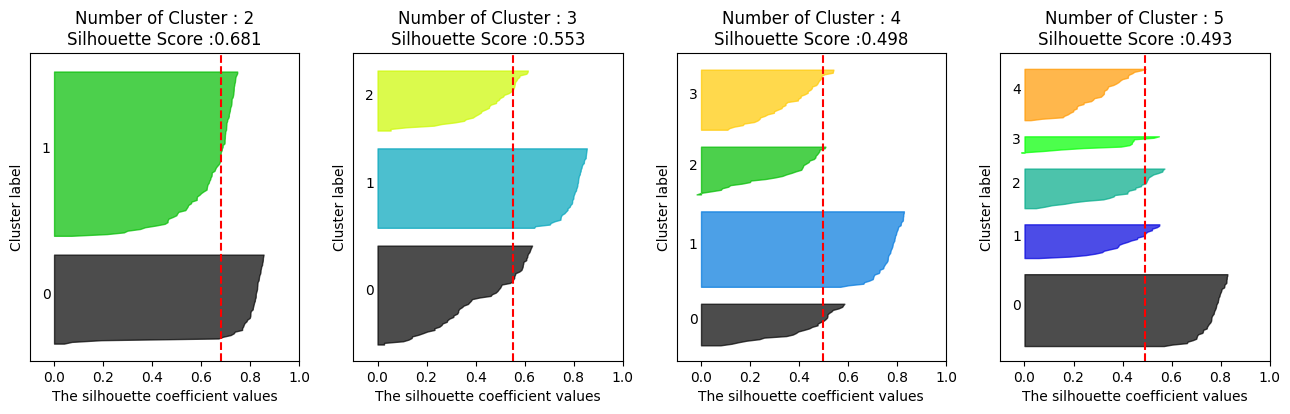

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

> 결과 : 군집 개수 2개로 하는 것이 가장 이상적

- 실루엣 계수를 통한 K-평균 군집 평가 방법 : 직관적으로 이해하기 쉬움, but 각 데이터별로 다른 데이터와의 거리 반복적 계산 필요 > 데이터 양 늘어날 시 수행 시간 크게 늘어남

>이 경우, 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안 고민 필요

## CH07.03. 평균 이동

### 평균 이동(Mean Shift)의 개요

평균 이동(Mean Shift) : K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행함
- K-평균과의 차이점 : 중심에 소속된 데이터의 평균 거리 중심으로 이동 X, 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동 O
- 데이터의 분포도를 이용해 군집 중심점을 찾음(<군집 중심점 = 데이터 포인트가 모여있는 곳)
 - 확률 밀도 함수(probability Density function) 이용
 - 가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심적으로 선정하기 때문

 - 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리를 KDE 함수 값으로 입력 > 그 반환 값을 현재 위치에서 업데이하면서 이동하는 방식을 전체 데이터에 반복적으로 적용 > 데이터의 군집 중심점을 찾아냄

 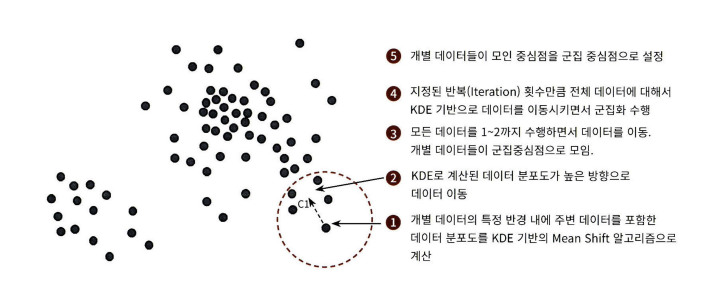

**KDE**(Kernel Density Estimation) : 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
-확률 밀도 함수 알기 = 특정 변수가 어떤 값을 갖게 될지에 대한 확률 알기 > 변수의 특성, 확률 분포 등 변수의 많은 요소 알 수 있음
- KDE : 개별 관측 데이터에 커널 함수 적용 뒤, 이 적용 값을 모두 더한 후, 개별 관측 데이터의 건수로 나눠 확률 밀도 함수 추정
 - 대표적인 커널 함수 : 가우시안 분포 함수
 - 예시
 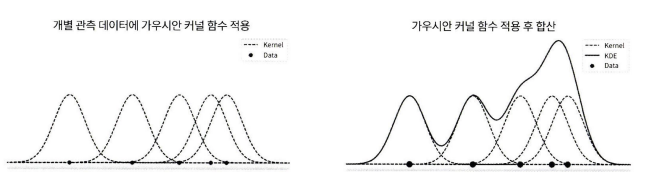

- KDE의 표현 식 : 다음과 같은 커널 함수식(K = 커널 함수 / x : 확률 변숫값 / xi : 관측값 / h : 대역폭)

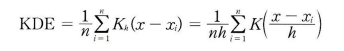

- KDE의 적절한 대역폭 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요
 - 작은 h 값 : 좁고 뾰족한 KDE > 변동성이 큰 방식으로 확률밀도함수 추정 > 과적합하기 쉬움
  - 큰 h 값 : 과도하게 평활화(smoothing)된 KDE > 지나치게 단순화된 방식으로 확률밀도함수 추정 > 과소적합하기 쉬움

  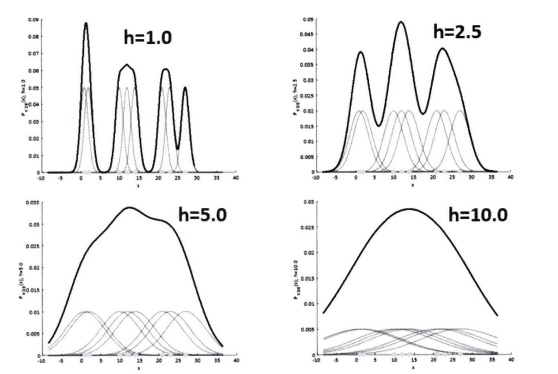

**평균 이동 군집화**

- 일반적으로 대역폭이 클수로 평활화된 KDE > 적은 수의 군집 중심점 가짐
- 군집의 개수 지정 X, 오직 대역폭의 크이게 따라 군집화 수행
- 사이킷런 : 평균 이동 군집화를 위해 MeanShift 클래스를 제공함
 - 가장 중요한 초기화 파라미터 : bandwidth = KDE의 대역폭 h와 동일함
 - 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공함


- make_blobs()의 cluster_std=0.7로 정한 3개 군집의 데이터에 대해 bandwidth=0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제 살펴보기

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


> 결과 : 군집이 지나치게 세분화되어 있음

- 일반적으로 bandwidth 값 작게 할수록 군집 개수 많아짐 > bandwidth =1.0으로 살짝 올려 MeanShift 수행하기

In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- MeanShift : bandwidth를 최적화 값으로 설정하는 것이 매우 중요함 > 사이킷런, estimate_bandwidth() 함수를 제공함

- estimate_bandwidth(피처 데이터 세트) > 최적화된 bandwidth 값을 반환해줌

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


- estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행해보기

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 구성된 3개의 군집을 시각화해보기
 - cluster_centers_ 속성으로 군집 중심 좌표 표시 가능

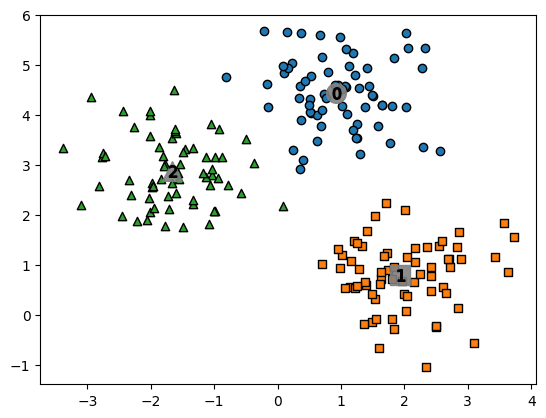

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

- target 값과 군집 label 값을 비교해보기 > Target 값과 군집 label 값이 1:1로 잘 매핑됨

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점
- 좀 더 유연한 군집화 가능 (데이터 세트 형태를 특정 형태로 가정 X)
- 이상치의 영향력 크지 X
- 미리 군집의 개수 정할 필요 X

평균 이동의 단점
- 알고리즘 수행 시간 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼

> 주로 평균 이동 : 분석 업무의 데이터셋보다 컴퓨터 비전 영역에서 더 많이 사용됨 / 이미지, 영상 데이터에서 특정 개체 구분 혹은 움직임 추적 시에 뛰어난 역할을 수행하는 알고리즘

## CH07.04. GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개
: 군집화를 적용하고자 하는 데이터가 여러 개의 정규 분포 = 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식

- 정규 분포 = 가우시안 분포 : 좌우 대칭형의 종 형태를 가진 연속 확률 함수

- GMM : 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함
 - 아래 예시 : 3개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정

 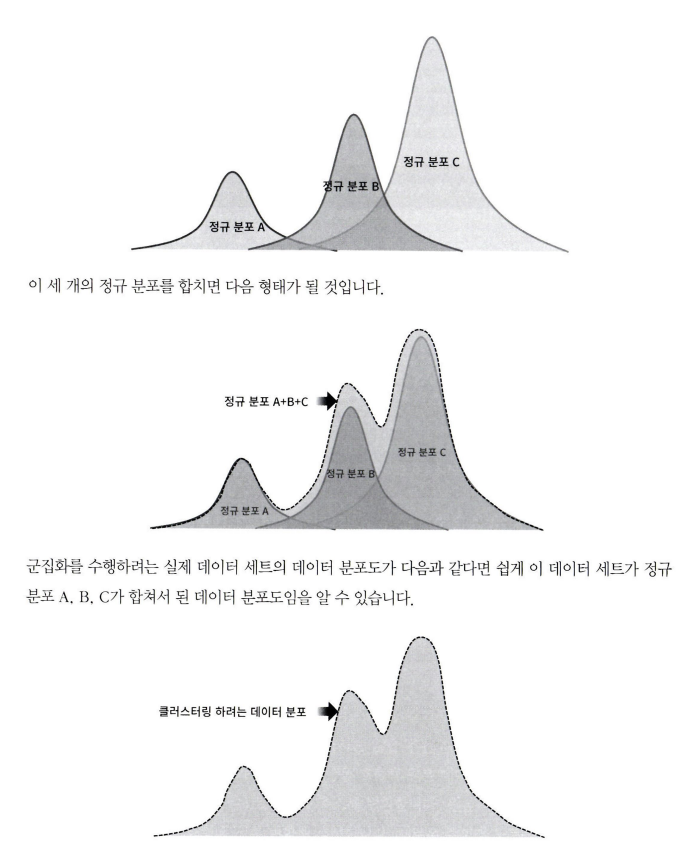

- 전체 데이터 세트 = 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성 > 서로 다른 정규 분포에 기반해 여러 개의 정규 분포 곡선 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결절하여 군집화 수행하는 방식 : GMM 군집화 방식

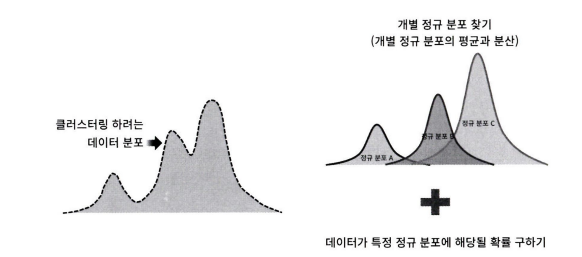



**GMM에서의 모수 추정** <대표적으로 2가지 추정
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률

- 모수 추정을 위해 EM(Expectation and Maximization) 방법을 적용함
 - 사이킷런 : GMM의 EM 방식을 통한 모수 추정 군집화를 위해 GaussianMixture 클래스 지원

### GMM을 이용한 붓꽃 데이터 세트 군집화

1. 붓꽃 데이터 세트를 DataFrame으로 로드하기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

2. n_components=3으로 설정하고 GaussianMixture로 군집화 수행하기
- GaussianMixture 객체의 가장 중요한 초기화 파라미터 : n_components : gaussian mixture의 모델의 총 개수

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### GMM과 K-평균의 비교

- 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율이 더욱 높아짐

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

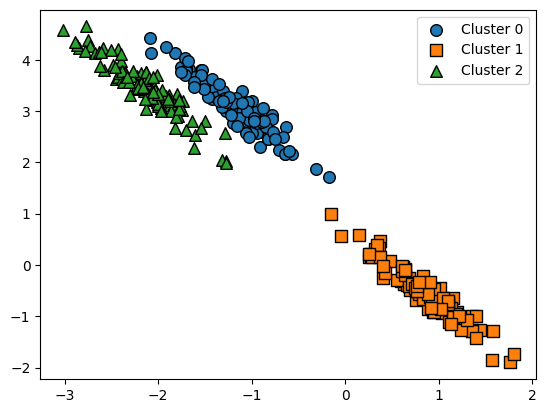

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, clustr_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data = X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


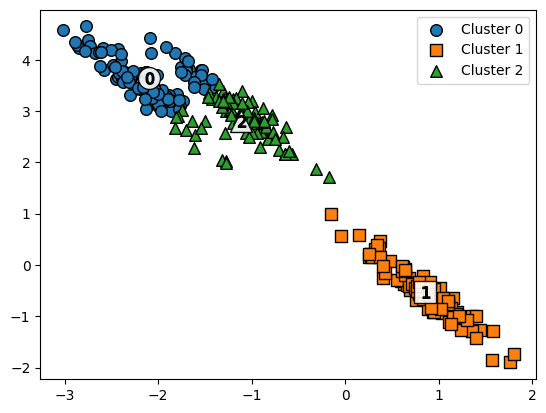

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

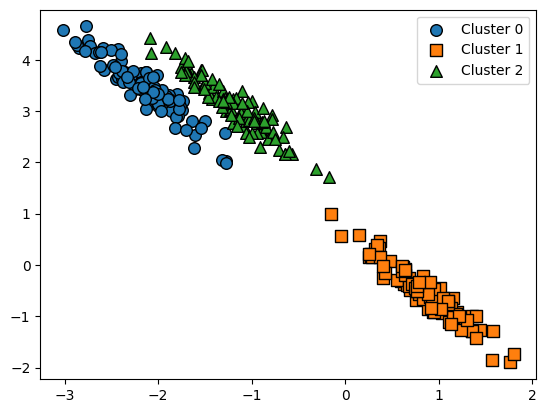

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


## CH07.05. DBSCAN

### DBSCAN 개요
: 밀도 기반 군집화의 대표적인 알고리즘

- 다른 군집화 방법론과는 다르게, 데이터의 분포가 기하핮거으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함

### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


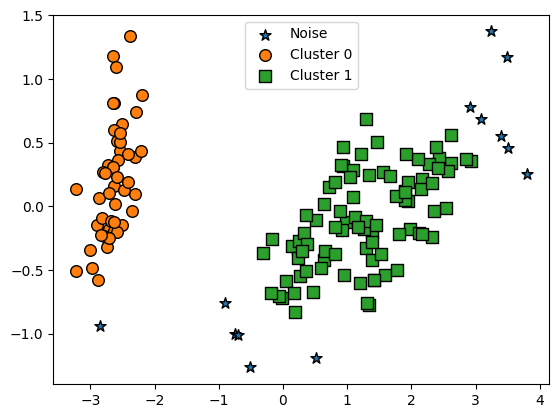

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_component=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


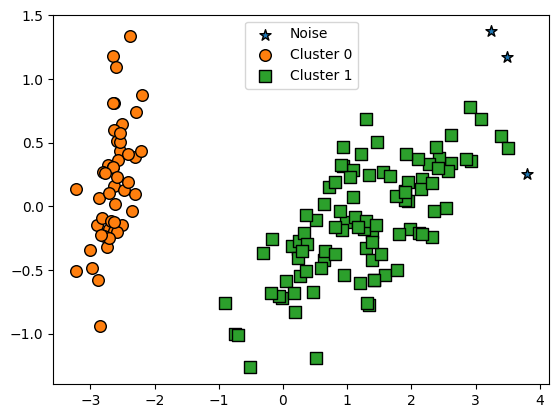

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


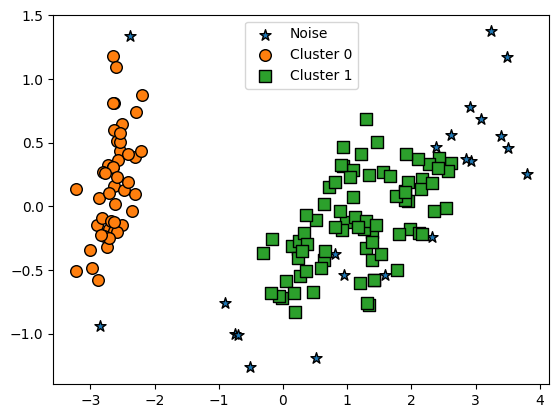

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트

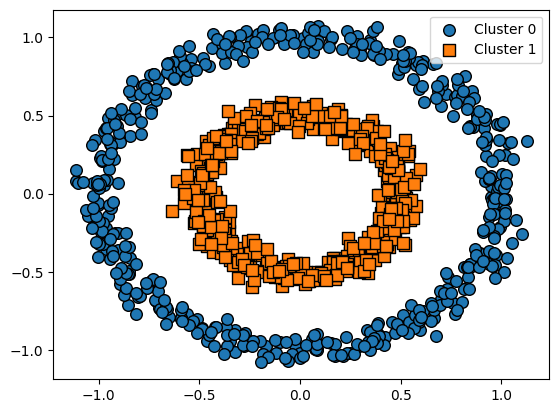

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


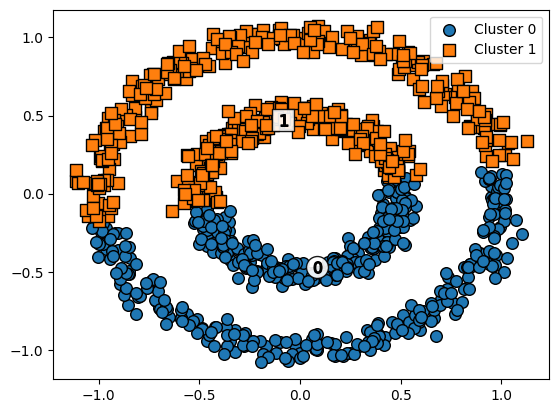

In [ ]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

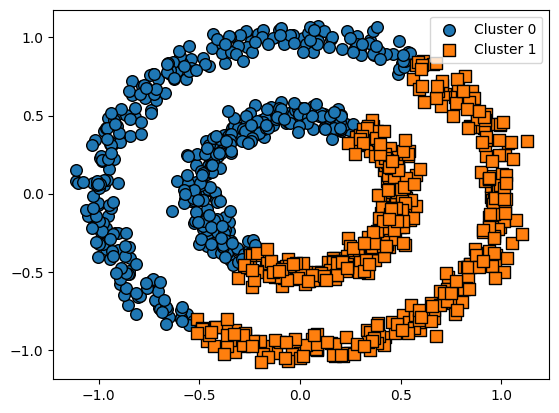

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

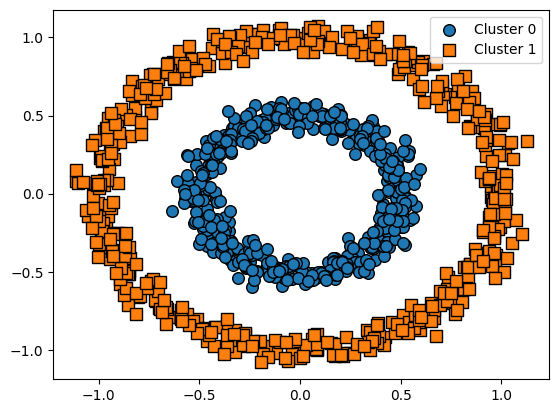

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)